In [51]:
import json
from warnings import filterwarnings as _fw_

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

_fw_('ignore')

In [52]:
df = pd.read_csv('df.csv', encoding='utf-8').drop(columns='Unnamed: 0')
# df

In [53]:
with open('binary_columns.json', 'r', encoding='utf-8') as file:
    binary_columns = json.load(file)
# binary_columns[:-2]

In [54]:
target = binary_columns[0:13]
school_head5 = binary_columns[14:30]
school_tail5 = binary_columns[31:46]
course = binary_columns[47:56]
profession = binary_columns[57:66]

# CM

In [55]:
df_CM = df[binary_columns[:-2]]
df_CM["TARGET ALL"] = (df_CM[target].sum(axis=1) / len(target) * 100).apply(int) // 10
df_CM["SCHOOL_HEAD5 ALL"] = (df_CM[school_head5].sum(axis=1) / len(school_head5) * 100).apply(int) // 10
df_CM["SCHOOL_TAIL5 ALL"] = (df_CM[school_tail5].sum(axis=1) / len(school_tail5) * 100).apply(int) // 10
df_CM["COURSE ALL"] = (df_CM[course].sum(axis=1) / len(course) * 100).apply(int) // 10
df_CM["PROFESSION ALL"] = (df_CM[profession].sum(axis=1) / len(profession) * 100).apply(int) // 10
df_CM.filter(regex='ALL')

,TARGET ALL,SCHOOL_HEAD5 ALL,SCHOOL_TAIL5 ALL,COURSE ALL,PROFESSION ALL
0,1,0,0,1,2
1,0,3,2,3,3
2,3,3,3,4,6
3,2,3,2,1,2
4,0,3,3,1,3
...,...,...,...,...,...
9754,2,2,0,2,3
9755,0,3,3,2,5
9756,3,3,2,3,3
9757,3,3,3,2,3


In [56]:
# from sklearn.metrics import confusion_matrix
# cm_2 = confusion_matrix(df_CM["TARGET ALL"], df_CM["COURSE ALL"])
#
# plt.figure(figsize=(5, 5))
# sns.heatmap(cm_2,
#             cbar=True,
#             square=True,
#             fmt='.0f',
#             annot=True,
#             annot_kws={'size': 7},
#             cmap='YlOrBr')

<AxesSubplot: >

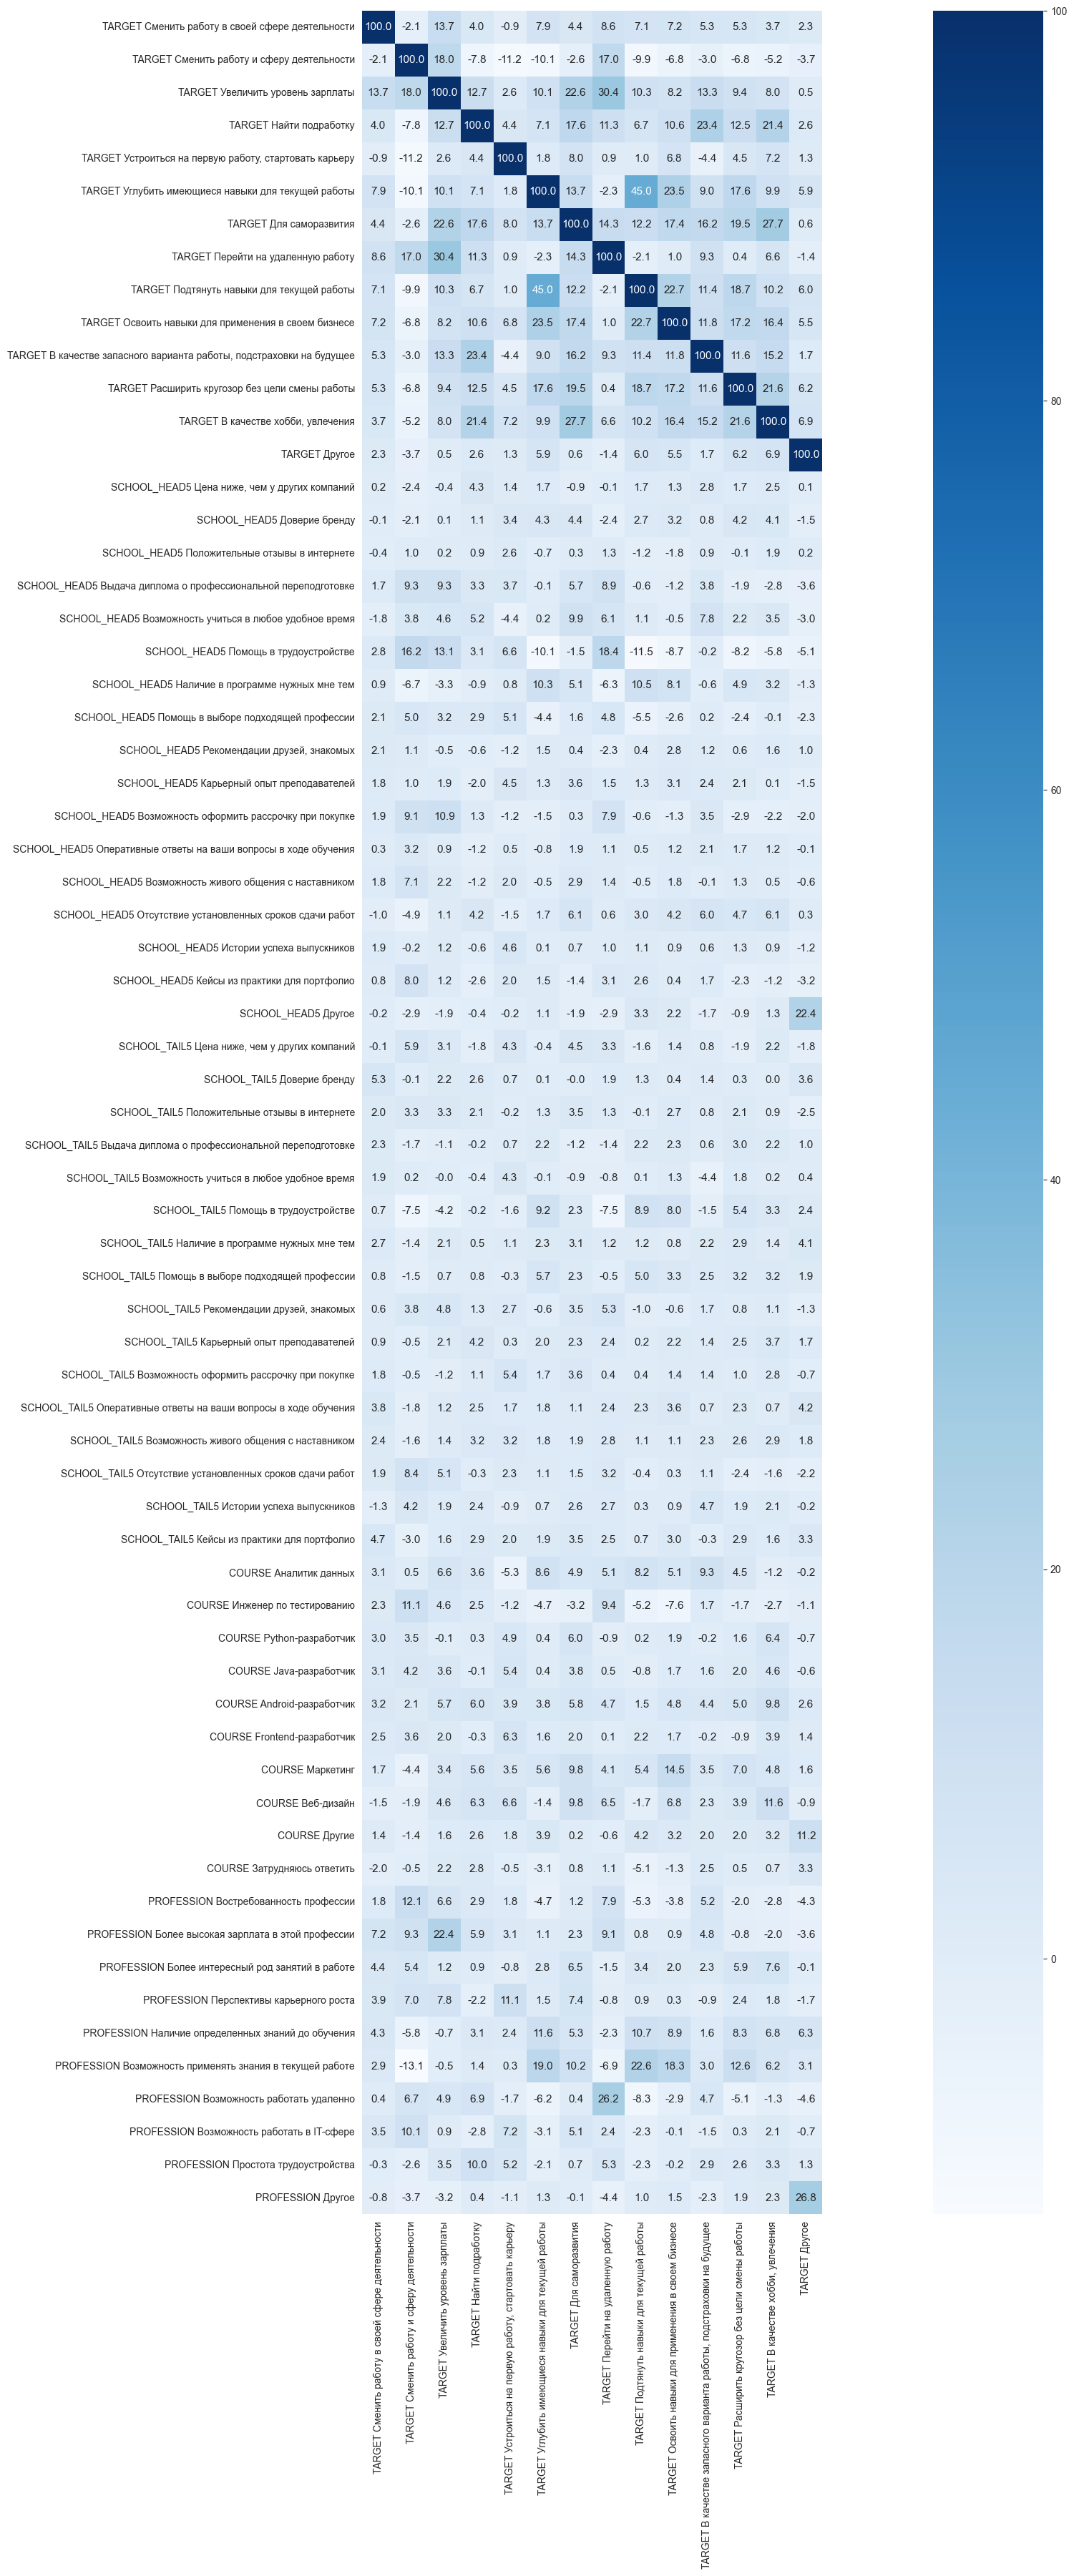

In [57]:
correlation = df_CM[binary_columns[:-2]].corr()
plt.figure(figsize=(40, 40))
sns.heatmap(100*correlation.filter(regex="TARGET"), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 11}, cmap='Blues')